In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

# path to project root
sys.path.append('c:/users/ananasy/pycharmProjects/data_analysis/')

from task_2.sub_task_1 import data_handler
from task_2.sub_task_1 import utils
from task_2.sub_task_1.peregudins_cube import struct_svm
from task_2.sub_task_1.peregudins_cube import simple_svm

In [11]:
def run_simple():
    dh = data_handler.DataHandler()
    X_train, y_train = dh.get_lst_train()
    X_train = np.array(X_train, dtype='int32')
    y_train = np.array(y_train, dtype='int32')
    simple_classifier = simple_svm.SimpleSVM(X_train, y_train, dh.CLASS_NUM, dh.DIM)

    #################################################################
    # get optimal learning rate with k-fold cross-validation
    
    alphas = [10**(-i) for i in range(5)]
    classifier = lambda X, y: simple_svm.SimpleSVM(X, y, dh.CLASS_NUM, dh.DIM)
    opt_alpha_idx = utils.k_fold_validation(X_train, y_train, alphas, 3, classifier)
    print('Optimal regularization coefficient: {0}'.format(alphas[opt_alpha_idx]))
    
    #################################################################

    simple_classifier.train(alphas[opt_alpha_idx])

    X_test, y_test = dh.get_lst_test()

    n = len(X_test)
    score = 0
    for idx, x in enumerate(X_test):
        pred = simple_classifier.get_prediction(x)
        if pred == y_test[idx]:
            score += 1

    print('Accuracy: {}'.format(score/n))

### Simple svm training

In [12]:
run_simple()

0.5013958682300391
0.3986599664991625
0.39382095663502703
0.3900986413549228
0.3921459147589801
Optimal regularization coefficient: 0.001
Accuracy: 0.6179746456591915


In [4]:
def run_struct():
    dh = data_handler.DataHandler()

    X, y = dh.get_train_set()
    X, y_one_hot = dh.get_train_set_one_hot()
    dim, class_num = dh.dim, dh.class_num

    #################################################################
    # get optimal learning rate with k-fold cross-validation

    alphas = [10**(-i) for i in range(1, 6)]
    classifier = lambda X, y, y_: struct_svm.StructSVM(X, y, y_, dh.CLASS_NUM, dh.DIM)
    opt_alpha_idx = utils.k_fold_validation(X, y, alphas, 3, classifier, y_one_hot, True)
    print('Optimal regularization coefficient: {0}'.format(alphas[opt_alpha_idx]))

    #################################################################

    ssvm = struct_svm.StructSVM(X, y, y_one_hot, class_num, dim)

    ssvm.train(reg_step=alphas[opt_alpha_idx])

    x_test, y_test = dh.get_test_set()

    mean_loss = 0
    for idx, sample in enumerate(x_test):
        y_pred = ssvm.get_prediction(sample)
        mean_loss += ssvm.hamming_loss_(y_test[idx], y_pred)

    print("Mean loss: {}".format(mean_loss/x_test.shape[0]))

    A_matrix = ssvm.A_matrix
    plt.matshow(A_matrix)
    plt.colorbar()
    plt.title("A_matrix visualization")
    plt.xticks(np.arange(25), dh.dictionary)
    plt.yticks(np.arange(25), dh.dictionary)
    plt.show()

### Structured svm training

---------- Epoch 0 ----------


Current loss: 0.8223871105254082
---------- Epoch 1 ----------


Current loss: 0.73723543595884
---------- Epoch 2 ----------


Current loss: 0.7141089229919017
---------- Epoch 3 ----------


Current loss: 0.6697743922743922
---------- Epoch 4 ----------


Current loss: 0.7088198149368358
---------- Epoch 5 ----------


Current loss: 0.6767452523835505
---------- Epoch 6 ----------


Current loss: 0.6947070718879229
---------- Epoch 7 ----------


Current loss: 0.6620180233478107
---------- Epoch 8 ----------


Current loss: 0.6869940933770717
---------- Epoch 9 ----------


Current loss: 0.7304365079365084


---------- Epoch 0 ----------


Current loss: 0.8647856812218521
---------- Epoch 1 ----------


Current loss: 0.7673614506061318
---------- Epoch 2 ----------


Current loss: 0.7190862506288043
---------- Epoch 3 ----------


Current loss: 0.6941399853101985
---------- Epoch 4 ----------


Current loss: 0.6758596722426511
---------- Epoch 5 ----------


Current loss: 0.6505472069301853
---------- Epoch 6 ----------


Current loss: 0.7093361071552561
---------- Epoch 7 ----------


Current loss: 0.6798023312385019
---------- Epoch 8 ----------


Current loss: 0.6661042739766144
---------- Epoch 9 ----------


Current loss: 0.707052338914042


---------- Epoch 0 ----------


Current loss: 0.8802048601516693
---------- Epoch 1 ----------


Current loss: 0.7766320027490244
---------- Epoch 2 ----------


Current loss: 0.7056213467383681
---------- Epoch 3 ----------


Current loss: 0.7194821844821838
---------- Epoch 4 ----------


Current loss: 0.6593403877446435
---------- Epoch 5 ----------


Current loss: 0.6660261251750615
---------- Epoch 6 ----------


Current loss: 0.7193524737673672
---------- Epoch 7 ----------


Current loss: 0.7296249081887385
---------- Epoch 8 ----------


Current loss: 0.712579979122532
---------- Epoch 9 ----------


Current loss: 0.7281098983758562


0.6849498791806482
---------- Epoch 0 ----------


Current loss: 0.8245261653240374
---------- Epoch 1 ----------


Current loss: 0.7341982721769952
---------- Epoch 2 ----------


Current loss: 0.6906988342626635
---------- Epoch 3 ----------


Current loss: 0.6618141964418562
---------- Epoch 4 ----------


Current loss: 0.4797840162201866
---------- Epoch 5 ----------


Current loss: 0.45286208472378686
---------- Epoch 6 ----------


Current loss: 0.44668426136511263
---------- Epoch 7 ----------


Current loss: 0.4305480748565858
---------- Epoch 8 ----------


Current loss: 0.4284291417802056
---------- Epoch 9 ----------


Current loss: 0.4327074403138234


---------- Epoch 0 ----------


Current loss: 0.8872931205909931
---------- Epoch 1 ----------


Current loss: 0.7443189729891849
---------- Epoch 2 ----------


Current loss: 0.6446239044643297
---------- Epoch 3 ----------


Current loss: 0.5186208649506521
---------- Epoch 4 ----------


Current loss: 0.473728115855776
---------- Epoch 5 ----------


Current loss: 0.4269536373791695
---------- Epoch 6 ----------


Current loss: 0.43923295971168297
---------- Epoch 7 ----------


Current loss: 0.4116770994962489
---------- Epoch 8 ----------


Current loss: 0.4037887703313238
---------- Epoch 9 ----------


Current loss: 0.41470147464828316


---------- Epoch 0 ----------


Current loss: 0.8877279989514031
---------- Epoch 1 ----------


Current loss: 0.7446414755457309
---------- Epoch 2 ----------


Current loss: 0.6396108501427644
---------- Epoch 3 ----------


Current loss: 0.5864772284453129
---------- Epoch 4 ----------


Current loss: 0.5359647621881662
---------- Epoch 5 ----------


Current loss: 0.4478797797946734
---------- Epoch 6 ----------


Current loss: 0.4518544162693098
---------- Epoch 7 ----------


Current loss: 0.437883806500828
---------- Epoch 8 ----------


Current loss: 0.43268761380463555
---------- Epoch 9 ----------


Current loss: 0.4314924555350087


0.4490678520593052
---------- Epoch 0 ----------


Current loss: 0.8504580702984963
---------- Epoch 1 ----------


Current loss: 0.719733582020816
---------- Epoch 2 ----------


Current loss: 0.6605101281697024
---------- Epoch 3 ----------


Current loss: 0.627312185450484
---------- Epoch 4 ----------


Current loss: 0.5637422978912335
---------- Epoch 5 ----------


Current loss: 0.4488118796097516
---------- Epoch 6 ----------


Current loss: 0.44033504911164534
---------- Epoch 7 ----------


Current loss: 0.4317751515623862
---------- Epoch 8 ----------


Current loss: 0.42597822390375556
---------- Epoch 9 ----------


Current loss: 0.427342810853449


---------- Epoch 0 ----------


Current loss: 0.8812237053726416
---------- Epoch 1 ----------


Current loss: 0.7420884434714218
---------- Epoch 2 ----------


Current loss: 0.6553314179909928
---------- Epoch 3 ----------


Current loss: 0.5743245229947354
---------- Epoch 4 ----------


Current loss: 0.5213030999733128
---------- Epoch 5 ----------


Current loss: 0.44863664704090295
---------- Epoch 6 ----------


Current loss: 0.42137339020317766
---------- Epoch 7 ----------


Current loss: 0.39391862865267185
---------- Epoch 8 ----------


Current loss: 0.3904165456293117
---------- Epoch 9 ----------


Current loss: 0.38839646759859564


---------- Epoch 0 ----------


Current loss: 0.8763471339535175
---------- Epoch 1 ----------


Current loss: 0.7504898942664902
---------- Epoch 2 ----------


Current loss: 0.6605120529588614
---------- Epoch 3 ----------


Current loss: 0.5915178851880979
---------- Epoch 4 ----------


Current loss: 0.4969533598788922
---------- Epoch 5 ----------


Current loss: 0.42679259865430064
---------- Epoch 6 ----------


Current loss: 0.4227230098506695
---------- Epoch 7 ----------


Current loss: 0.4072200199327858
---------- Epoch 8 ----------


Current loss: 0.40815072043795514
---------- Epoch 9 ----------


Current loss: 0.4085461819504378


0.4464392484691631
---------- Epoch 0 ----------


Current loss: 0.841361599393515
---------- Epoch 1 ----------


Current loss: 0.7441219714092047
---------- Epoch 2 ----------


Current loss: 0.7088869168656403
---------- Epoch 3 ----------


Current loss: 0.5944744971340704
---------- Epoch 4 ----------


Current loss: 0.49994504904079345
---------- Epoch 5 ----------


Current loss: 0.44346565373161123
---------- Epoch 6 ----------


Current loss: 0.43607536080940346
---------- Epoch 7 ----------


Current loss: 0.4169374183735888
---------- Epoch 8 ----------


Current loss: 0.42189859195178403
---------- Epoch 9 ----------


Current loss: 0.4239414309095161


---------- Epoch 0 ----------


Current loss: 0.8768623161708266
---------- Epoch 1 ----------


Current loss: 0.7479235067532941
---------- Epoch 2 ----------


Current loss: 0.6945421481591693
---------- Epoch 3 ----------


Current loss: 0.564615927807417
---------- Epoch 4 ----------


Current loss: 0.5014442413378586
---------- Epoch 5 ----------


Current loss: 0.43349290780141886
---------- Epoch 6 ----------


Current loss: 0.40075728644877634
---------- Epoch 7 ----------


Current loss: 0.38217179392711365
---------- Epoch 8 ----------


Current loss: 0.38514205062077417
---------- Epoch 9 ----------


Current loss: 0.3828044355172018


---------- Epoch 0 ----------


Current loss: 0.8746801307439612
---------- Epoch 1 ----------


Current loss: 0.7872359496295672
---------- Epoch 2 ----------


Current loss: 0.6503930761909485
---------- Epoch 3 ----------


Current loss: 0.6076173826173823
---------- Epoch 4 ----------


Current loss: 0.5038726344577407
---------- Epoch 5 ----------


Current loss: 0.4254021156148818
---------- Epoch 6 ----------


Current loss: 0.4264600234281083
---------- Epoch 7 ----------


Current loss: 0.41752147970233083
---------- Epoch 8 ----------


Current loss: 0.4053595931255512
---------- Epoch 9 ----------


Current loss: 0.41042004685621736


0.45624700560598014
---------- Epoch 0 ----------


Current loss: 0.8419960535917983
---------- Epoch 1 ----------


Current loss: 0.7106825385016884
---------- Epoch 2 ----------


Current loss: 0.725775241307157
---------- Epoch 3 ----------


Current loss: 0.6342012184033456
---------- Epoch 4 ----------


Current loss: 0.520908352876438
---------- Epoch 5 ----------


Current loss: 0.44567459136608106
---------- Epoch 6 ----------


Current loss: 0.44454018794444305
---------- Epoch 7 ----------


Current loss: 0.42124455922328274
---------- Epoch 8 ----------


Current loss: 0.4215681894937219
---------- Epoch 9 ----------


Current loss: 0.4169164582462457


---------- Epoch 0 ----------


Current loss: 0.8730791371748816
---------- Epoch 1 ----------


Current loss: 0.7555776670138381
---------- Epoch 2 ----------


Current loss: 0.660368992709418
---------- Epoch 3 ----------


Current loss: 0.57219243522435
---------- Epoch 4 ----------


Current loss: 0.49684382402467486
---------- Epoch 5 ----------


Current loss: 0.43353644582368006
---------- Epoch 6 ----------


Current loss: 0.41541727775770343
---------- Epoch 7 ----------


Current loss: 0.41477218408069483
---------- Epoch 8 ----------


Current loss: 0.4074930388760183
---------- Epoch 9 ----------


Current loss: 0.41188436858649663


---------- Epoch 0 ----------


Current loss: 0.8775581983028794
---------- Epoch 1 ----------


Current loss: 0.7715945992541735
---------- Epoch 2 ----------


Current loss: 0.6955268313247033
---------- Epoch 3 ----------


Current loss: 0.587881999796893
---------- Epoch 4 ----------


Current loss: 0.5125125937891898
---------- Epoch 5 ----------


Current loss: 0.4257876225429417
---------- Epoch 6 ----------


Current loss: 0.4090232167359826
---------- Epoch 7 ----------


Current loss: 0.3891699789572129
---------- Epoch 8 ----------


Current loss: 0.3918477916882171
---------- Epoch 9 ----------


Current loss: 0.3896683930726485


0.445704999337478
Optimal regularization coefficient: 1e-05
---------- Epoch 0 ----------


Current loss: 0.847514027166016
---------- Epoch 1 ----------


Current loss: 0.6602734859837144
---------- Epoch 2 ----------


Current loss: 0.5637449356199357
---------- Epoch 3 ----------


Current loss: 0.49378968569309445
---------- Epoch 4 ----------


Current loss: 0.41720139866446665
---------- Epoch 5 ----------


Current loss: 0.410708810602277
---------- Epoch 6 ----------


Current loss: 0.41242138937451495
---------- Epoch 7 ----------


Current loss: 0.4226187992878332
---------- Epoch 8 ----------


Current loss: 0.42483023605182696
---------- Epoch 9 ----------


Current loss: 0.43446522700784057


Mean loss: 0.4436282497314396


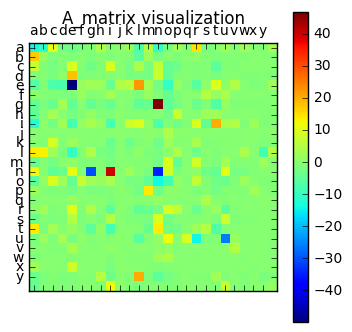

In [5]:
run_struct()

### Check gradient on random generated dataset

In [5]:
ssvm = struct_svm.StructSVM()
_, n, a = ssvm.check_grad(3, 10)
print(np.c_[n[:3*10], a[:3*10]])

[[ -2.69812161e-01  -2.69812166e-01]
 [ -1.52588721e+00  -1.52588715e+00]
 [ -6.26509699e-01  -6.26509656e-01]
 [  1.12302455e-01   1.12302458e-01]
 [ -9.38977163e-02  -9.38976883e-02]
 [  2.97158484e-02   2.97158326e-02]
 [  1.85064217e-01   1.85064165e-01]
 [  2.87179092e-01   2.87179062e-01]
 [ -3.53965937e-01  -3.53965915e-01]
 [  9.65024407e-02   9.65024391e-02]
 [  9.58807727e-02   9.58807524e-02]
 [ -1.25133994e-01  -1.25133965e-01]
 [  3.88895200e-02   3.88895096e-02]
 [ -1.29433102e-01  -1.29433106e-01]
 [ -4.01456033e-02  -4.01456028e-02]
 [  4.74306594e-02   4.74306635e-02]
 [  4.27992006e-02   4.27991619e-02]
 [  3.81722618e-02   3.81722732e-02]
 [  8.94941099e-02   8.94940973e-02]
 [ -2.58866484e-02  -2.58866389e-02]
 [  2.02963637e-02   2.02963771e-02]
 [ -5.14553822e-01  -5.14553829e-01]
 [  1.06970786e+00   1.06970784e+00]
 [  1.19049307e+00   1.19049306e+00]
 [  2.14290026e-01   2.14289984e-01]
 [  2.29840067e-01   2.29840048e-01]
 [ -1.89669593e-01  -1.89669583e-01]
 